In [2]:
import scipy.stats as ss
import pylab as plt
import numpy as np
import os
import sys
sys.path.append(os.path.abspath(os.path.join('..')))
import pyabc
from pyabc.plots import plot_marginals

%matplotlib notebook

## Example of n coin flips

In [3]:
# create beta prior and likelihood and posterior
N = 100
a, b = 2,2
prior = ss.beta(2,2) # assume a fair coin
likelihood = lambda p: ss.binom(N, p)
posterior = lambda x: ss.beta(a + x, b + N - x)

# create simulator
def simulator(p, size=1):
    global N
    return ss.binom(N, p).rvs(size)

<IPython.core.display.Javascript object>


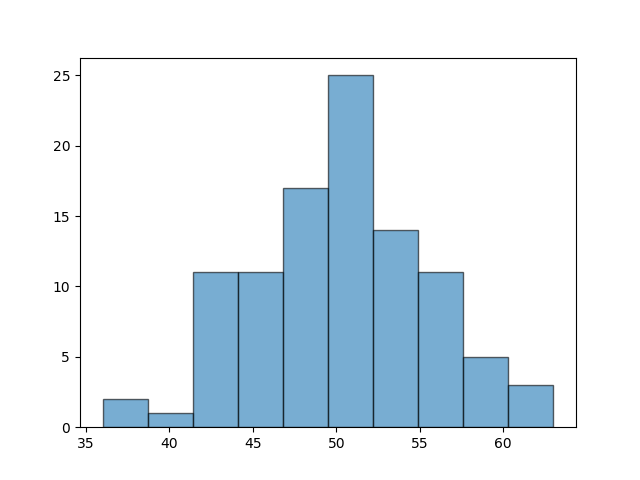

In [6]:
# what does the simulator produce?
plt.figure()
plt.hist(simulator(0.5, N), alpha=0.6, edgecolor="k")
plt.show()

# observation
X = simulator(0.2)

<IPython.core.display.Javascript object>


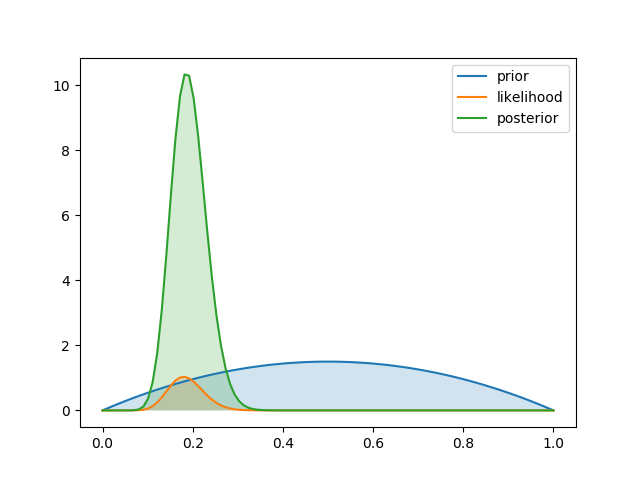

In [7]:
# what does the prior, likelihood and posterior look like?
plt.figure()
x = np.linspace(0,1, 100)

y = prior.pdf(x)
plt.plot(x,y, label="prior"); plt.fill_between(x, y1=0, y2=y, alpha=0.2)

scale = 10
y = scale * likelihood(x).pmf(X)
plt.plot(x,y, label="likelihood"); plt.fill_between(x, y1=0, y2=y, alpha=0.2)

y = posterior(X).pdf(x)
plt.plot(x,y, label="posterior"); plt.fill_between(x, y1=0, y2=y, alpha=0.2)

plt.legend()
plt.show()

## Use our ABC package

In [8]:
# now ABC
# create priorww
prior = pyabc.Prior("beta", 2, 2, name="p")

# sample and pdf of prior class


<IPython.core.display.Javascript object>


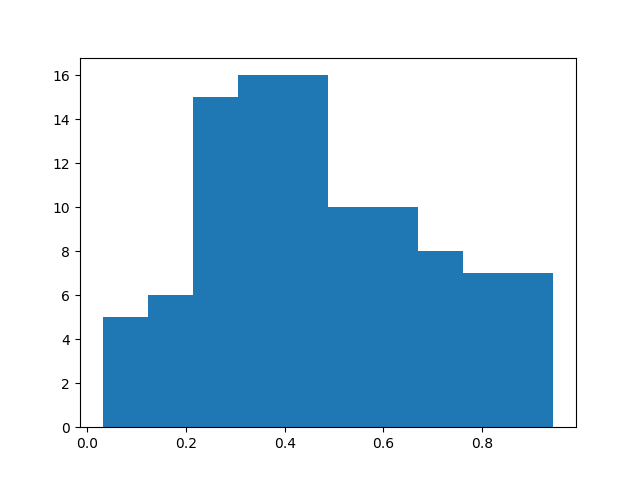

(array([  5.,   6.,  15.,  16.,  16.,  10.,  10.,   8.,   7.,   7.]),
 array([ 0.03050635,  0.12192286,  0.21333937,  0.30475587,  0.39617238,
         0.48758889,  0.5790054 ,  0.67042191,  0.76183842,  0.85325493,
         0.94467143]),
 <a list of 10 Patch objects>)

In [10]:
plt.figure()
plt.hist(prior.sample(100))

In [11]:
# create sampler
rej = pyabc.RejectionSampler(priors=prior, simulator=simulator, summaries=lambda x: x, observation=X)

# sample -> try different epsilon
rej.sample(nr_samples=100, threshold=0)

Rejection sampler started with threshold: 0 and number of samples: 100
Samples:    100 - Threshold: 0.0000 - Iterations:      11000 - Acceptance rate: 0.009091 - Time:     7.62 s


In [7]:
rej.Thetas

array([[ 0.16890724],
       [ 0.21537965],
       [ 0.22829704],
       [ 0.3190784 ],
       [ 0.2380022 ],
       [ 0.22942072],
       [ 0.19964485],
       [ 0.24814153],
       [ 0.30535536],
       [ 0.21482308],
       [ 0.26935456],
       [ 0.21533854],
       [ 0.2154916 ],
       [ 0.28317473],
       [ 0.17866438],
       [ 0.20886548],
       [ 0.24734525],
       [ 0.28897618],
       [ 0.2579943 ],
       [ 0.30867783],
       [ 0.1714597 ],
       [ 0.22129068],
       [ 0.22564133],
       [ 0.20236846],
       [ 0.25180051],
       [ 0.2295825 ],
       [ 0.16713547],
       [ 0.17584975],
       [ 0.1692429 ],
       [ 0.28258987],
       [ 0.13182348],
       [ 0.28029028],
       [ 0.19728683],
       [ 0.20315681],
       [ 0.26423382],
       [ 0.21716504],
       [ 0.19853081],
       [ 0.1700219 ],
       [ 0.20017923],
       [ 0.19206528],
       [ 0.21238336],
       [ 0.21220025],
       [ 0.21580858],
       [ 0.19797355],
       [ 0.16895746],
       [ 0

<IPython.core.display.Javascript object>


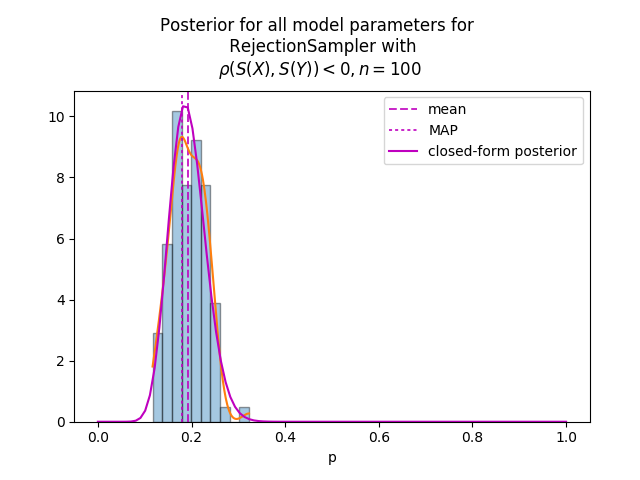

In [12]:
# plot marginals and posterior
fig = plot_marginals(rej)

In [13]:
# and add posterior
x = np.linspace(0,1, 100)
y = posterior(X).pdf(x)
plt.plot(x,y, "-m", label='closed-form posterior')
plt.legend()

In [40]:
# sample exact
rej.sample(nr_samples=1000, threshold=0)

Rejection sampler started with threshold: 0 and number of samples: 1000
Samples:   1000 - Threshold: 0.0000 - Iterations:     103000 - Acceptance rate: 0.009709 - Time:    56.31 s


<IPython.core.display.Javascript object>


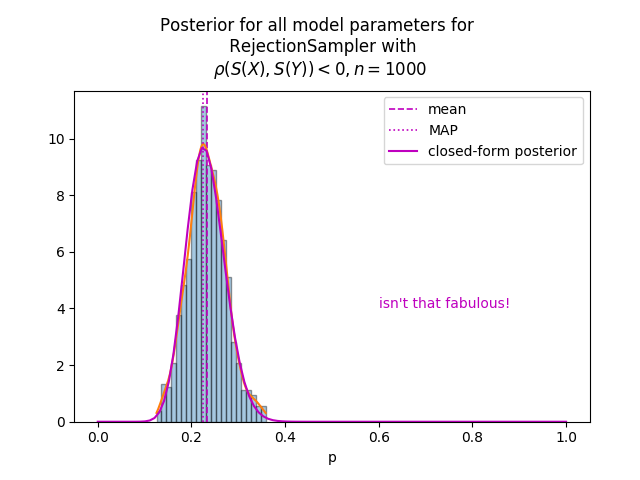

Text(0.6,4,"isn't that fabulous!")

In [48]:
# plot marginals and posterior
fig = plot_marginals(rej)

# and add posterior
x = np.linspace(0,1, 100)
y = posterior(X).pdf(x)
plt.plot(x,y, "-m", label='closed-form posterior')
plt.legend()

plt.annotate("isn't that fabulous!", xy=(0.6, 4), xytext=(0.6, 4), color="m")